<h1 style="text-align:center">Principal Component Analysis</1>

<h1 style="text-align:center">Haulage Company - Air Pressure Systems Anaysis</h1>



## Licence 

GNU Public Licence of DataSet
This file is part of APS Failure and Operational Data for Scania Trucks.

Copyright (c) <2016> <Scania CV AB>

This program (APS Failure and Operational Data for Scania Trucks) is 

free software: you can redistribute it and/or modify

it under the terms of the GNU General Public License as published by

the Free Software Foundation, either version 3 of the License, or

(at your option) any later version.

This program is distributed in the hope that it will be useful,

but WITHOUT ANY WARRANTY; without even the implied warranty of

MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the

GNU General Public License for more details.

You should have received a copy of the GNU General Public License

along with this program.  If not, see <http://www.gnu.org/licenses/>.



## libraries 


Import numpy for mathematical functions

Import Pandas for analysis tools

Import matplotlib.pylot for visualizations

Import Seaborn for data visualiations based on matplotlib

Import Sklearn for for classification, regression, clustering and dimensionality reduction <cite id="eqxr4">(‘Scikit Learn - Introduction’ n.d.)</cite>

Install  and import Missingo to Visualize missing data <cite id="sn7z5">(McDonald 2021)</cite>









## Introduction

This notebook will analyize the csv file 'ApsFailureSet' which contains data on Air Pressure Systems collected from heavy Scania trucks in everyday usage.

The following report will characterize the data, clean and evalute the data using EDA (Exploratory Data Analysis) visualisation, and use PCA (Principal Component Analysis) which employs dimensionality reduction to encode the most important relationships to exact more accurate visuations and improve efficency 

## Data Cleaning and EDA 

Firstly I import the libraries I intend to use to carry out Data cleaning, preparation, EDA, PCA and visualations.  



In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<cite id="0dalq">(Waskom 2021)</cite>

I need to then read in the csv dataset to my notebook using pandas function 

In [2]:
ApsFailureSet_df = pd.read_csv("aps_failure_set.csv") 

I need to get an initial look at the dataset so I employ the .head() function to get the first 10 rows

In [3]:
ApsFailureSet_df.head(10) 

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   
5   neg   38312     na  2130706432    218      0      0      0      0      0   
6   neg      14      0           6     na      0      0      0      0      0   
7   neg  102960     na  2130706432    116      0      0      0      0      0   
8   neg   78696     na           0     na      0      0      0      0      0   
9   pos  153204      0         182     na      0      0      0      0      0   

   ...   ee_002  ee_003   ee_004   ee_005   ee_006  ee_007  ee_008 ee_009  \
0  ...  1240520  493384   721044   469792   339156  157956   73224      0   
1  ...   421400  178064   293306   245416   133654   81140   97576   1500   
2  ...   277378  159812   423992   409564   320746  158022   95128    514   
3  ...      240      46       58       44       10       0       0      0   
4  ...   622012  229790   405298   347188   286954  311560  433954   1218   
5  ...   388574  288278   900430   300412     1534     338     856      0   
6  ...      168      48       60       28        0       0       0      0   
7  ...   715518  384948   915978  1052166  1108672  341532  129504   7832   
8  ...   699290  362510  1190028  1012704   160090   63216   41202      4   
9  ...   129862   26872    34044    22472    34362       0       0      0   

  ef_000 eg_000  
0      0      0  
1      0      0  
2      0      0  
3      4     32  
4      0      0  
5      0      0  
6      0      0  
7      0      0  
8      0      0  
9      0      0  

[10 rows x 171 columns]

It is clear from this initial look that there are missing values that will need to be addressed.  I will take a look at the distribution of the set first with the describe function 


In [4]:
ApsFailureSet_df.describe()

aa_000
count  6.000000e+04
mean   5.933650e+04
std    1.454301e+05
min    0.000000e+00
25%    8.340000e+02
50%    3.077600e+04
75%    4.866800e+04
max    2.746564e+06

From this initial look I can tell immediately that there is skewness in the distribution as there is quite a difference from the mean and 50%.  I can now look into the data to see if there is any duplicated data within the set 

In [5]:
ApsFailureSet_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Length: 60000, dtype: bool

In [6]:
ApsFailureSet_df.duplicated().sum() #shows HOW MANY rows are duplicated

0

As there are no duplicates I can now turn my attention to the missing values and assess how to deal with them.  Firstly I take a look at the computed value of NaN values using the isnull function 

In [7]:
ApsFailureSet_df.isnull().sum() 

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [8]:
ApsFailureSet_df.isnull().values.any() 

False

From this function it returns zero null values, however from my original look at my dataset, there are values that have a caterorical input to indicate a missing value.  I need to replace these using the na_values function  as pandas doesn't recognise any other  categorical inputation 

In [9]:
mvf = ["n.a.","?","NA","n/a","na","--"] 
ApsFailureSet_df = pd.read_csv("aps_failure_set.csv",na_values=mvf)  

I can now take a look at the dataset to see the values have been replaced so I can use pandas to accurately survey the missing data and I can decide from there how to deal with it to maintain integrity of the dataset 

In [10]:
ApsFailureSet_df.head()

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1   neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
2   neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3   neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4   neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0     0.0   

   ag_002  ...     ee_002    ee_003    ee_004    ee_005    ee_006    ee_007  \
0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0  157956.0   
1     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   81140.0   
2     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0  158022.0   
3     0.0  ...      240.0      46.0      58.0      44.0      10.0       0.0   
4     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0  311560.0   

     ee_008  ee_009  ef_000  eg_000  
0   73224.0     0.0     0.0     0.0  
1   97576.0  1500.0     0.0     0.0  
2   95128.0   514.0     0.0     0.0  
3       0.0     0.0     4.0    32.0  
4  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

In [11]:
ApsFailureSet_df.isnull().values.any() 

True

In [12]:
ApsFailureSet_df.isnull().sum() 

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

I can now see that there are a significant number of missing values in the set. There are several options to deal with this missing data but I would need to get a closer look the overall picture.  I will look at the shape to see what is the size of the information I am dealing with

In [13]:
ApsFailureSet_df.shape

(60000, 171)

I also want to look at my dependent feature to to a shapshot of the distribution between the two categories in this variable

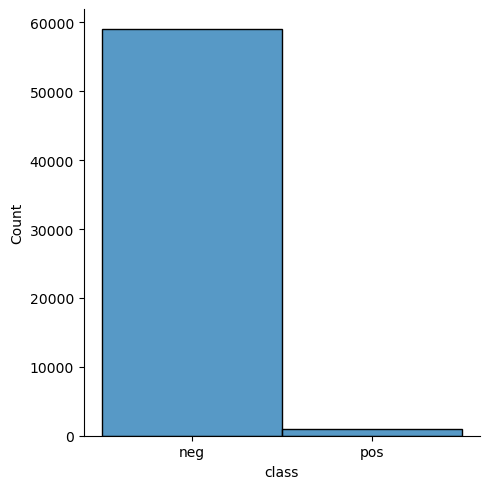

In [14]:
sns.displot(ApsFailureSet_df["class"])

From this plot I can see there are only two classes which indicates to me that it is a classification problem as opposed to a regression problem.  It is also important to take a look at the datatypes to see if they are uniformed and understand how to approach the classification problem


In [15]:
dtypes = ApsFailureSet_df.dtypes 

In [16]:
dtypes.head(600)

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

I can see on inital look that most features are floats but there is one integer.  I would like to establish which features are integers and convert them to floats to maintain uniformity among the numerical data 

In [17]:
sel_cols = list(ApsFailureSet_df.select_dtypes(include='int64'))
print(sel_cols) 

['aa_000']


<cite id="kma4t">(‘Python for Data Analysis. Data Wrangling with Pandas, NumPy, and IPython (2017, O’Reilly).pdf’ n.d.)</cite>

Here I can see that there is just one feature I need to convert to a float and I do this using 'astype' function 

In [18]:
ApsFailureSet_df = ApsFailureSet_df.astype({'aa_000':'float'})
print(ApsFailureSet_df.dtypes)

class      object
aa_000    float64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object


I want to now return to my missing values to establish my approach in handling it.  Firstly I look at how much data I lose if I drop all rows with null values 

In [19]:
obs_df = ApsFailureSet_df.dropna(axis=0) 

In [20]:
obs_df.isna().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [21]:
obs_df.isnull().values.any() 

False

In [22]:
obs_df.shape

(591, 171)

In [23]:
obs_df.head()

class    aa_000  ab_000  ac_000  ad_000  ae_000  af_000  ag_000    ag_001  \
16    neg   31300.0     0.0   784.0   740.0     0.0     0.0     0.0       0.0   
179   neg   97000.0     0.0   378.0   160.0     0.0     0.0     0.0       0.0   
225   neg  124656.0     2.0   278.0   170.0     0.0     0.0     0.0       0.0   
394   pos  281324.0     2.0  3762.0  2346.0     0.0     0.0  4808.0  215720.0   
413   pos   43482.0     0.0  1534.0  1388.0     0.0     0.0     0.0       0.0   

       ag_002  ...     ee_002    ee_003    ee_004     ee_005     ee_006  \
16        0.0  ...   798872.0  112724.0   51736.0     7054.0     6628.0   
179       0.0  ...  1078982.0  313334.0  511330.0   552328.0   871528.0   
225       0.0  ...  1205696.0  866148.0  697610.0   700400.0  1900386.0   
394  967572.0  ...   624606.0  269976.0  638838.0  1358354.0   819918.0   
413   40024.0  ...   497196.0  121166.0  202272.0   232636.0   645690.0   

       ee_007  ee_008  ee_009  ef_000  eg_000  
16    27600.0     2.0     2.0     0.0     0.0  
179  871104.0  1980.0    42.0     0.0     0.0  
225  437532.0  3680.0     0.0     0.0     0.0  
394  262804.0  2824.0     0.0     0.0     0.0  
413      50.0     0.0     0.0     0.0     0.0  

[5 rows x 171 columns]

I can see that I have gone from 60,000 observations to 591 which is most of my dataset.  This approach is not an option 

In [24]:
var_df = ApsFailureSet_df.dropna(axis=1) 

In [25]:
var_df.shape

(60000, 2)

Again, similarly with the variables I can see that there is too much missing information to make a cull of the NaN values a viable option 

In [26]:
ApsFailureSet_df['class'] = ApsFailureSet_df['class'].replace(['pos','neg'],[1,0])

In order to run the feature through functions to clean and prepare it, we need to convert the target variable to numeric to make it possible to run predictive models 

I then want to visualise the amount of missing data to make a decision on how to handle it.  AS per the count previously, I can see that some features have little to none but some have a high volume of NaN values.  I need to take a look so what distribution the NaN values have 

In [27]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<cite id="hw6oh">(McDonald 2021)</cite>

In [28]:
import missingno as msno

<Axes: >

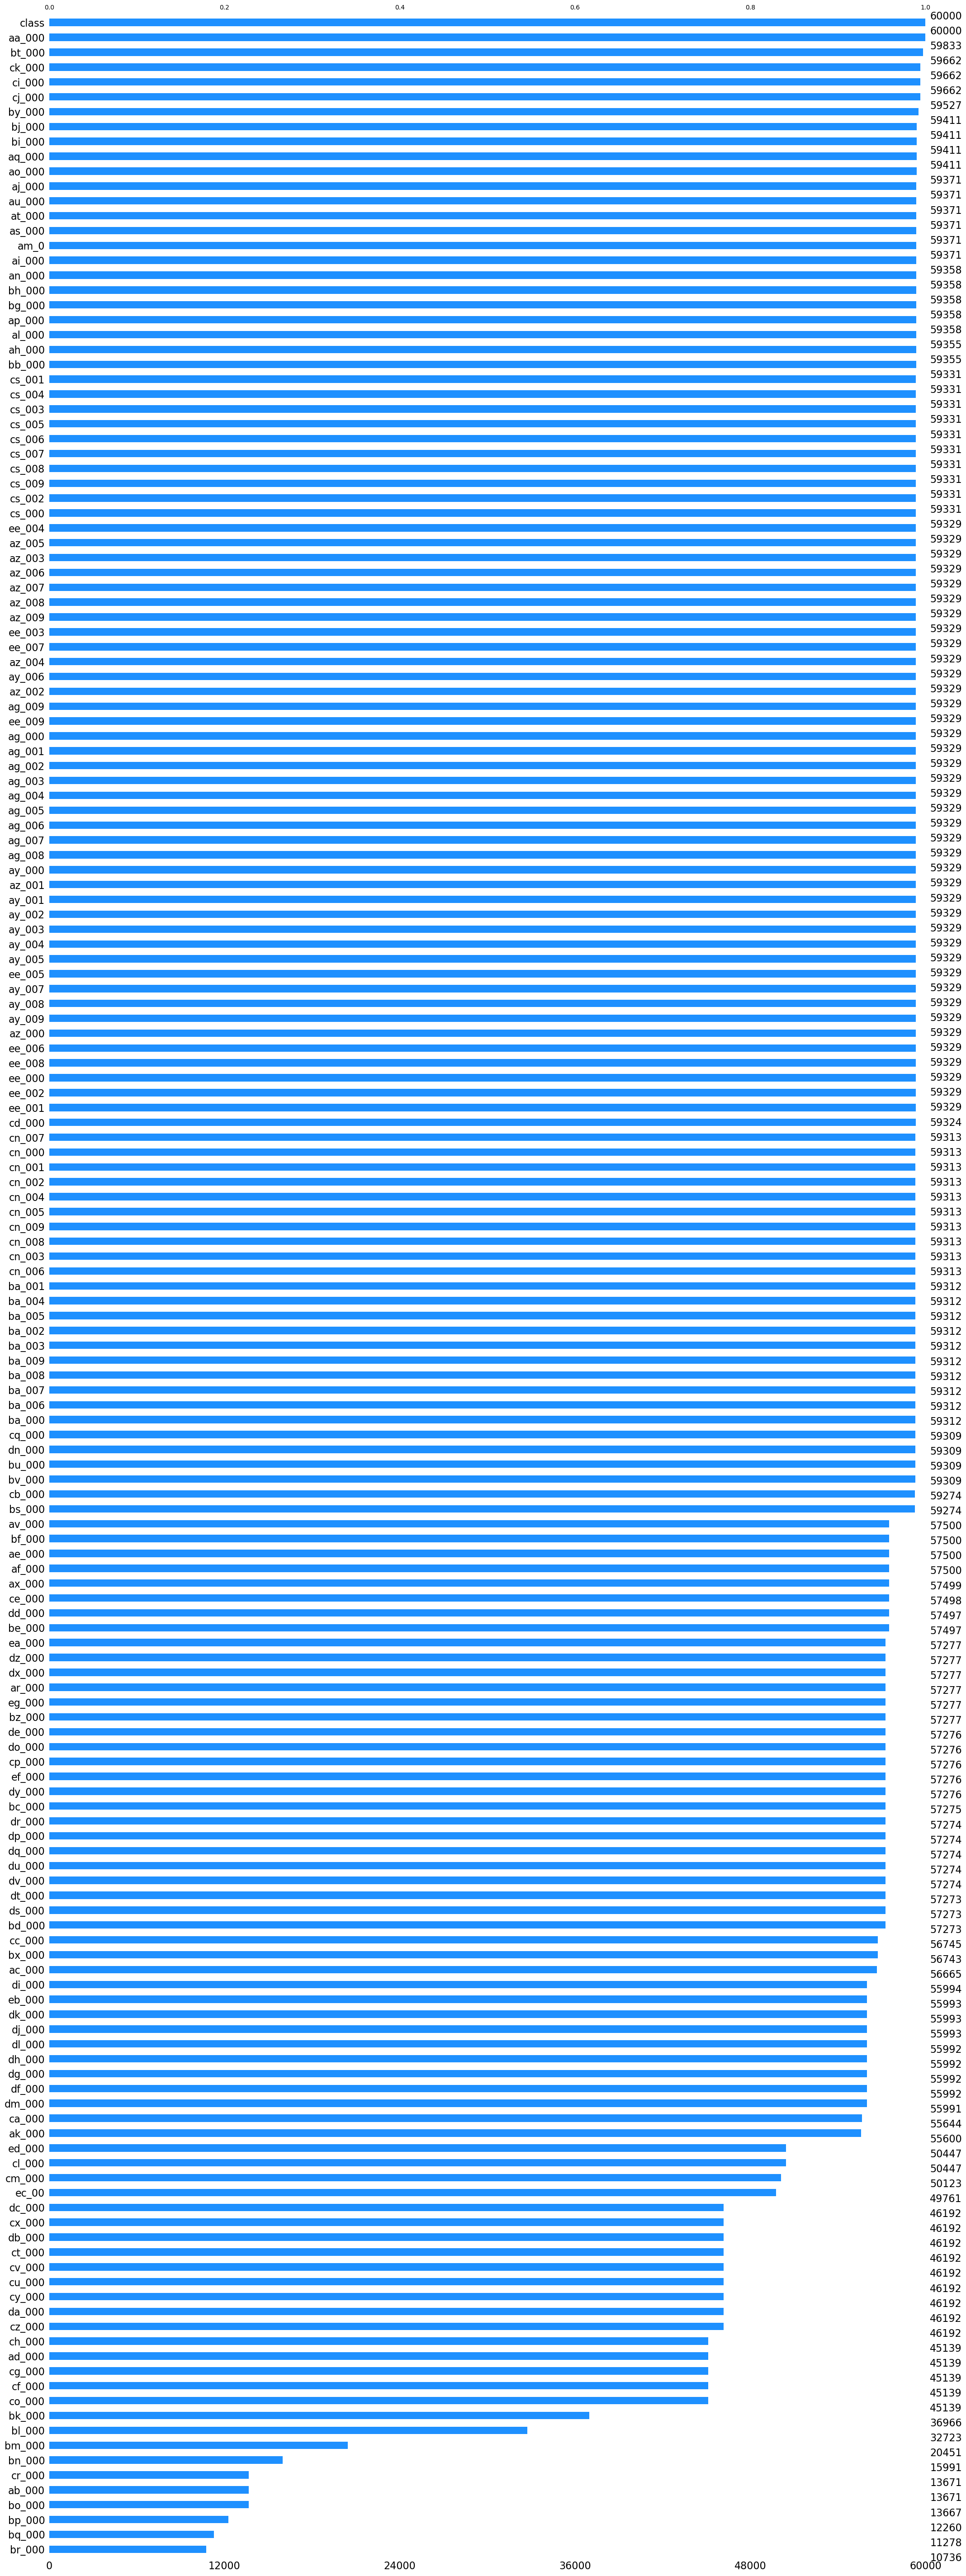

In [29]:
msno.bar(ApsFailureSet_df, color="dodgerblue", sort="ascending")

<cite id="jqdtg">(McDonald 2021)</cite>

In [30]:
#find new graph to plot missing data 

From this graph we can see that there are a small few columns that have a significant number of NaN values.  As there is not a lot of information we can derive from these, and the fact that they can alter the interpretation from the distribution, it would be wise to drop a certain number.  Practice is to drop columns with 60% and above missing values, however, in this case, given the quantity, I have taken the decision to drop 70% and above missing values 

In [31]:
 ApsNew_df = ApsFailureSet_df = ApsFailureSet_df.loc[:, ApsFailureSet_df.isnull().sum() < 0.7*ApsFailureSet_df.shape[0]]

<cite id="tgk5f">(LookIntoEast 2017)</cite>
    

In [32]:
ApsNew_df.shape

(60000, 164)

I can now see that I have droped 7 features from my dataset that will hopefully give me a more accurate outcome 

## Summary on the missing data and how to approach the remaining fields 

The rows were reduced from 60000 to 591 which is far too much data to lose so we need to establish how we are going to replace these values.  There are several methods using **fillna** as outlined below

1. method = 'pad' which fills in the NaN with the previous or following valid value.  Ususally used for image based datasets
2. method = 'bfill'which fills the NaN with the previous value
3. method = 'mean' / 'median' / 'mode', filling in from the specific statistical value you insert to the function

There is also the option to use the **interpolation** either 

1. Linear Interpolation which estimates the value of the NaN by connecting the dots in a straight line in increasing order
2. Polynomial Interpolation which fills in NaN with the lowest possible degree that passes through available data points
   where you specify the order <cite id="m2xwi">(Agrawal 2022)</cite>






In [33]:
ApsNew_df.describe()

class        aa_000        ac_000        ad_000        ae_000  \
count  60000.000000  6.000000e+04  5.666500e+04  4.513900e+04  57500.000000   
mean       0.016667  5.933650e+04  3.560143e+08  1.906206e+05      6.819130   
std        0.128020  1.454301e+05  7.948749e+08  4.040441e+07    161.543373   
min        0.000000  0.000000e+00  0.000000e+00  0.000000e+00      0.000000   
25%        0.000000  8.340000e+02  1.600000e+01  2.400000e+01      0.000000   
50%        0.000000  3.077600e+04  1.520000e+02  1.260000e+02      0.000000   
75%        0.000000  4.866800e+04  9.640000e+02  4.300000e+02      0.000000   
max        1.000000  2.746564e+06  2.130707e+09  8.584298e+09  21050.000000   

             af_000        ag_000        ag_001        ag_002        ag_003  \
count  57500.000000  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04   
mean      11.006817  2.216364e+02  9.757223e+02  8.606015e+03  8.859128e+04   
std      209.792592  2.047846e+04  3.420053e+04  1.503220e+05  7.617312e+05   
min        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    20070.000000  3.376892e+06  4.109372e+06  1.055286e+07  6.340207e+07   

       ...        ee_002        ee_003        ee_004        ee_005  \
count  ...  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04   
mean   ...  4.454897e+05  2.111264e+05  4.457343e+05  3.939462e+05   
std    ...  1.155540e+06  5.433188e+05  1.168314e+06  1.121044e+06   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  2.936000e+03  1.166000e+03  2.700000e+03  3.584000e+03   
50%    ...  2.337960e+05  1.120860e+05  2.215180e+05  1.899880e+05   
75%    ...  4.383960e+05  2.182320e+05  4.666140e+05  4.032220e+05   
max    ...  7.793393e+07  3.775839e+07  9.715238e+07  5.743524e+07   

             ee_006        ee_007        ee_008        ee_009        ef_000  \
count  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04  57276.000000   
mean   3.330582e+05  3.462714e+05  1.387300e+05  8.388915e+03      0.090579   
std    1.069160e+06  1.728056e+06  4.495100e+05  4.747043e+04      4.368855   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00      0.000000   
25%    5.120000e+02  1.100000e+02  0.000000e+00  0.000000e+00      0.000000   
50%    9.243200e+04  4.109800e+04  3.812000e+03  0.000000e+00      0.000000   
75%    2.750940e+05  1.678140e+05  1.397240e+05  2.028000e+03      0.000000   
max    3.160781e+07  1.195801e+08  1.926740e+07  3.810078e+06    482.000000   

             eg_000  
count  57277.000000  
mean       0.212756  
std        8.830641  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max     1146.000000  

[8 rows x 164 columns]

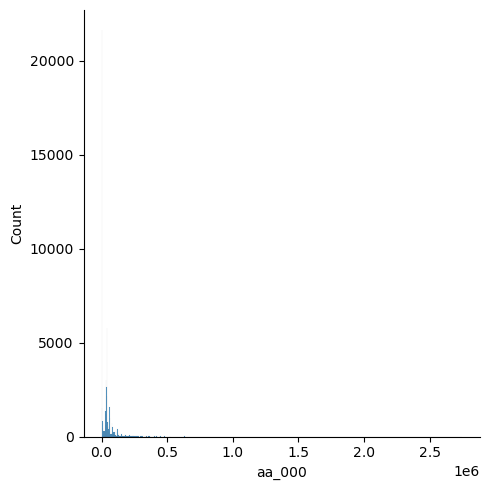

In [34]:
sns.displot(ApsFailureSet_df["aa_000"])

<Axes: xlabel='ee_002', ylabel='Count'>

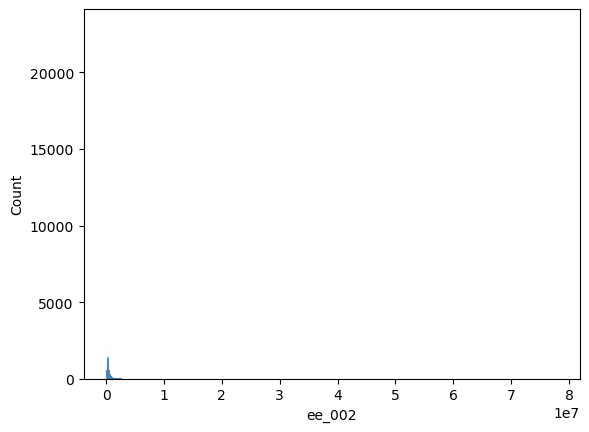

In [35]:

sns.histplot(data=ApsNew_df, x="ee_002")

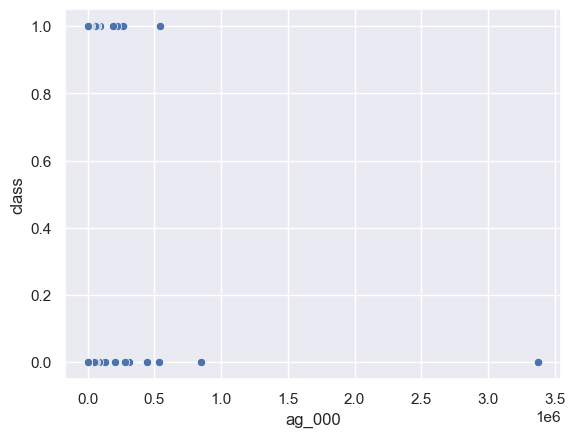

In [36]:
APS = ApsFailureSet_df
sns.set(color_codes=True)
ax = sns.scatterplot(x="ag_000", y="class", data=APS)


plt.show()

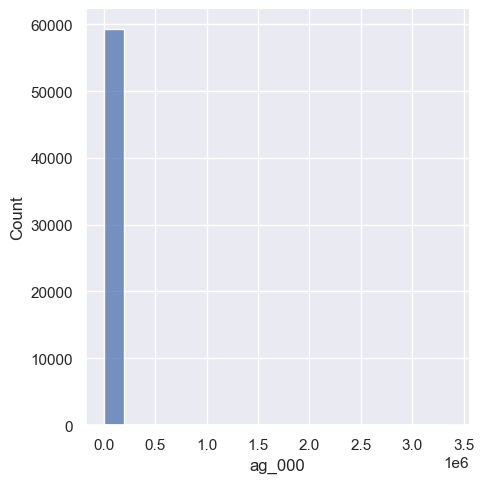

In [37]:
sns.displot(ApsFailureSet_df["ag_000"])

In the describe function we can immediately see there is a big difference between the max and mean in all rows which would indicate there are outliers and an abnormal distribution.  This would indicate that the best method to replace the NaN values would be fillna using 'median'  <cite id="29ufq">(Mallidi 2019)</cite>  I have affirmed this approach with a visual distribution using displot and pick random features to display.  The plots demonstrate that there are a lot of outliers and that the distribution is skewed which also points to the median approach to the null values 

In [38]:
ApsNew_df = ApsNew_df.fillna(ApsFailureSet_df.median())


In [39]:
ApsNew_df.isnull().values.any() 

False

In [40]:
ApsNew_df.set_index('class')


aa_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  ag_002  \
class                                                                           
0       76698.0  2.130706e+09   280.0     0.0     0.0     0.0     0.0     0.0   
0       33058.0  0.000000e+00   126.0     0.0     0.0     0.0     0.0     0.0   
0       41040.0  2.280000e+02   100.0     0.0     0.0     0.0     0.0     0.0   
0          12.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0     0.0   
0       60874.0  1.368000e+03   458.0     0.0     0.0     0.0     0.0     0.0   
...         ...           ...     ...     ...     ...     ...     ...     ...   
0      153002.0  6.640000e+02   186.0     0.0     0.0     0.0     0.0     0.0   
0        2286.0  2.130707e+09   224.0     0.0     0.0     0.0     0.0     0.0   
0         112.0  2.130706e+09    18.0     0.0     0.0     0.0     0.0     0.0   
0       80292.0  2.130706e+09   494.0     0.0     0.0     0.0     0.0     0.0   
0       40222.0  6.980000e+02   628.0     0.0     0.0     0.0     0.0     0.0   

       ag_003   ag_004  ...     ee_002    ee_003     ee_004     ee_005  \
class                   ...                                              
0         0.0  37250.0  ...  1240520.0  493384.0   721044.0   469792.0   
0         0.0  18254.0  ...   421400.0  178064.0   293306.0   245416.0   
0         0.0   1648.0  ...   277378.0  159812.0   423992.0   409564.0   
0       318.0   2212.0  ...      240.0      46.0       58.0       44.0   
0         0.0  43752.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...      ...  ...        ...       ...        ...        ...   
0      2564.0  59100.0  ...   998500.0  566884.0  1290398.0  1218244.0   
0         0.0    104.0  ...    10578.0    6760.0    21126.0    68424.0   
0         0.0     28.0  ...      792.0     386.0      452.0      144.0   
0         0.0    330.0  ...   699352.0  222654.0   347378.0   225724.0   
0         0.0   1226.0  ...   440066.0  183200.0   344546.0   254068.0   

          ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
class                                                           
0       339156.0  157956.0   73224.0       0.0     0.0     0.0  
0       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
0       320746.0  158022.0   95128.0     514.0     0.0     0.0  
0           10.0       0.0       0.0       0.0     4.0    32.0  
0       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
0      1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
0          136.0       0.0       0.0       0.0     0.0     0.0  
0          146.0    2622.0       0.0       0.0     0.0     0.0  
0       194440.0  165070.0  802280.0  388422.0     0.0     0.0  
0       225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 163 columns]

Here I have indexed the dependant variable 

The neg indicates whether it happend outside the APS and pos indicates whether it happens inside the APS 

<cite id="hupy9">(Valdecasas 2018)</cite>

In [41]:
ApsNew_df.head()

class   aa_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0      0  76698.0  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1      0  33058.0  0.000000e+00   126.0     0.0     0.0     0.0     0.0   
2      0  41040.0  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3      0     12.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4      0  60874.0  1.368000e+03   458.0     0.0     0.0     0.0     0.0   

   ag_002  ag_003  ...     ee_002    ee_003    ee_004    ee_005    ee_006  \
0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0   
1     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   
2     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0   
3     0.0   318.0  ...      240.0      46.0      58.0      44.0      10.0   
4     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0   

     ee_007    ee_008  ee_009  ef_000  eg_000  
0  157956.0   73224.0     0.0     0.0     0.0  
1   81140.0   97576.0  1500.0     0.0     0.0  
2  158022.0   95128.0   514.0     0.0     0.0  
3       0.0       0.0     0.0     4.0    32.0  
4  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 164 columns]

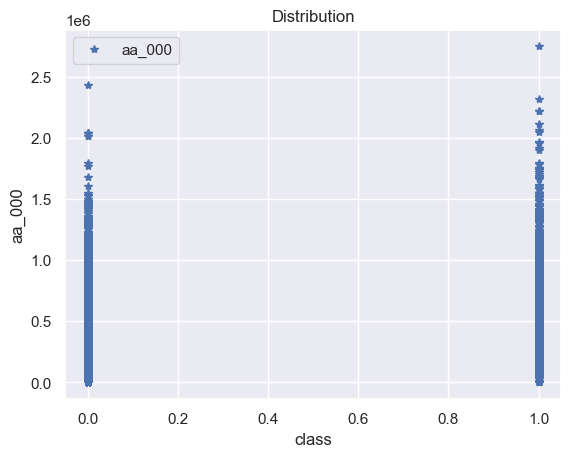

In [42]:
ApsNew_df.plot(x='class', y='aa_000', style='*') #the style '*'  can try with any symbol 
plt.title('Distribution')
plt.xlabel('class')
plt.ylabel('aa_000')
plt.show()

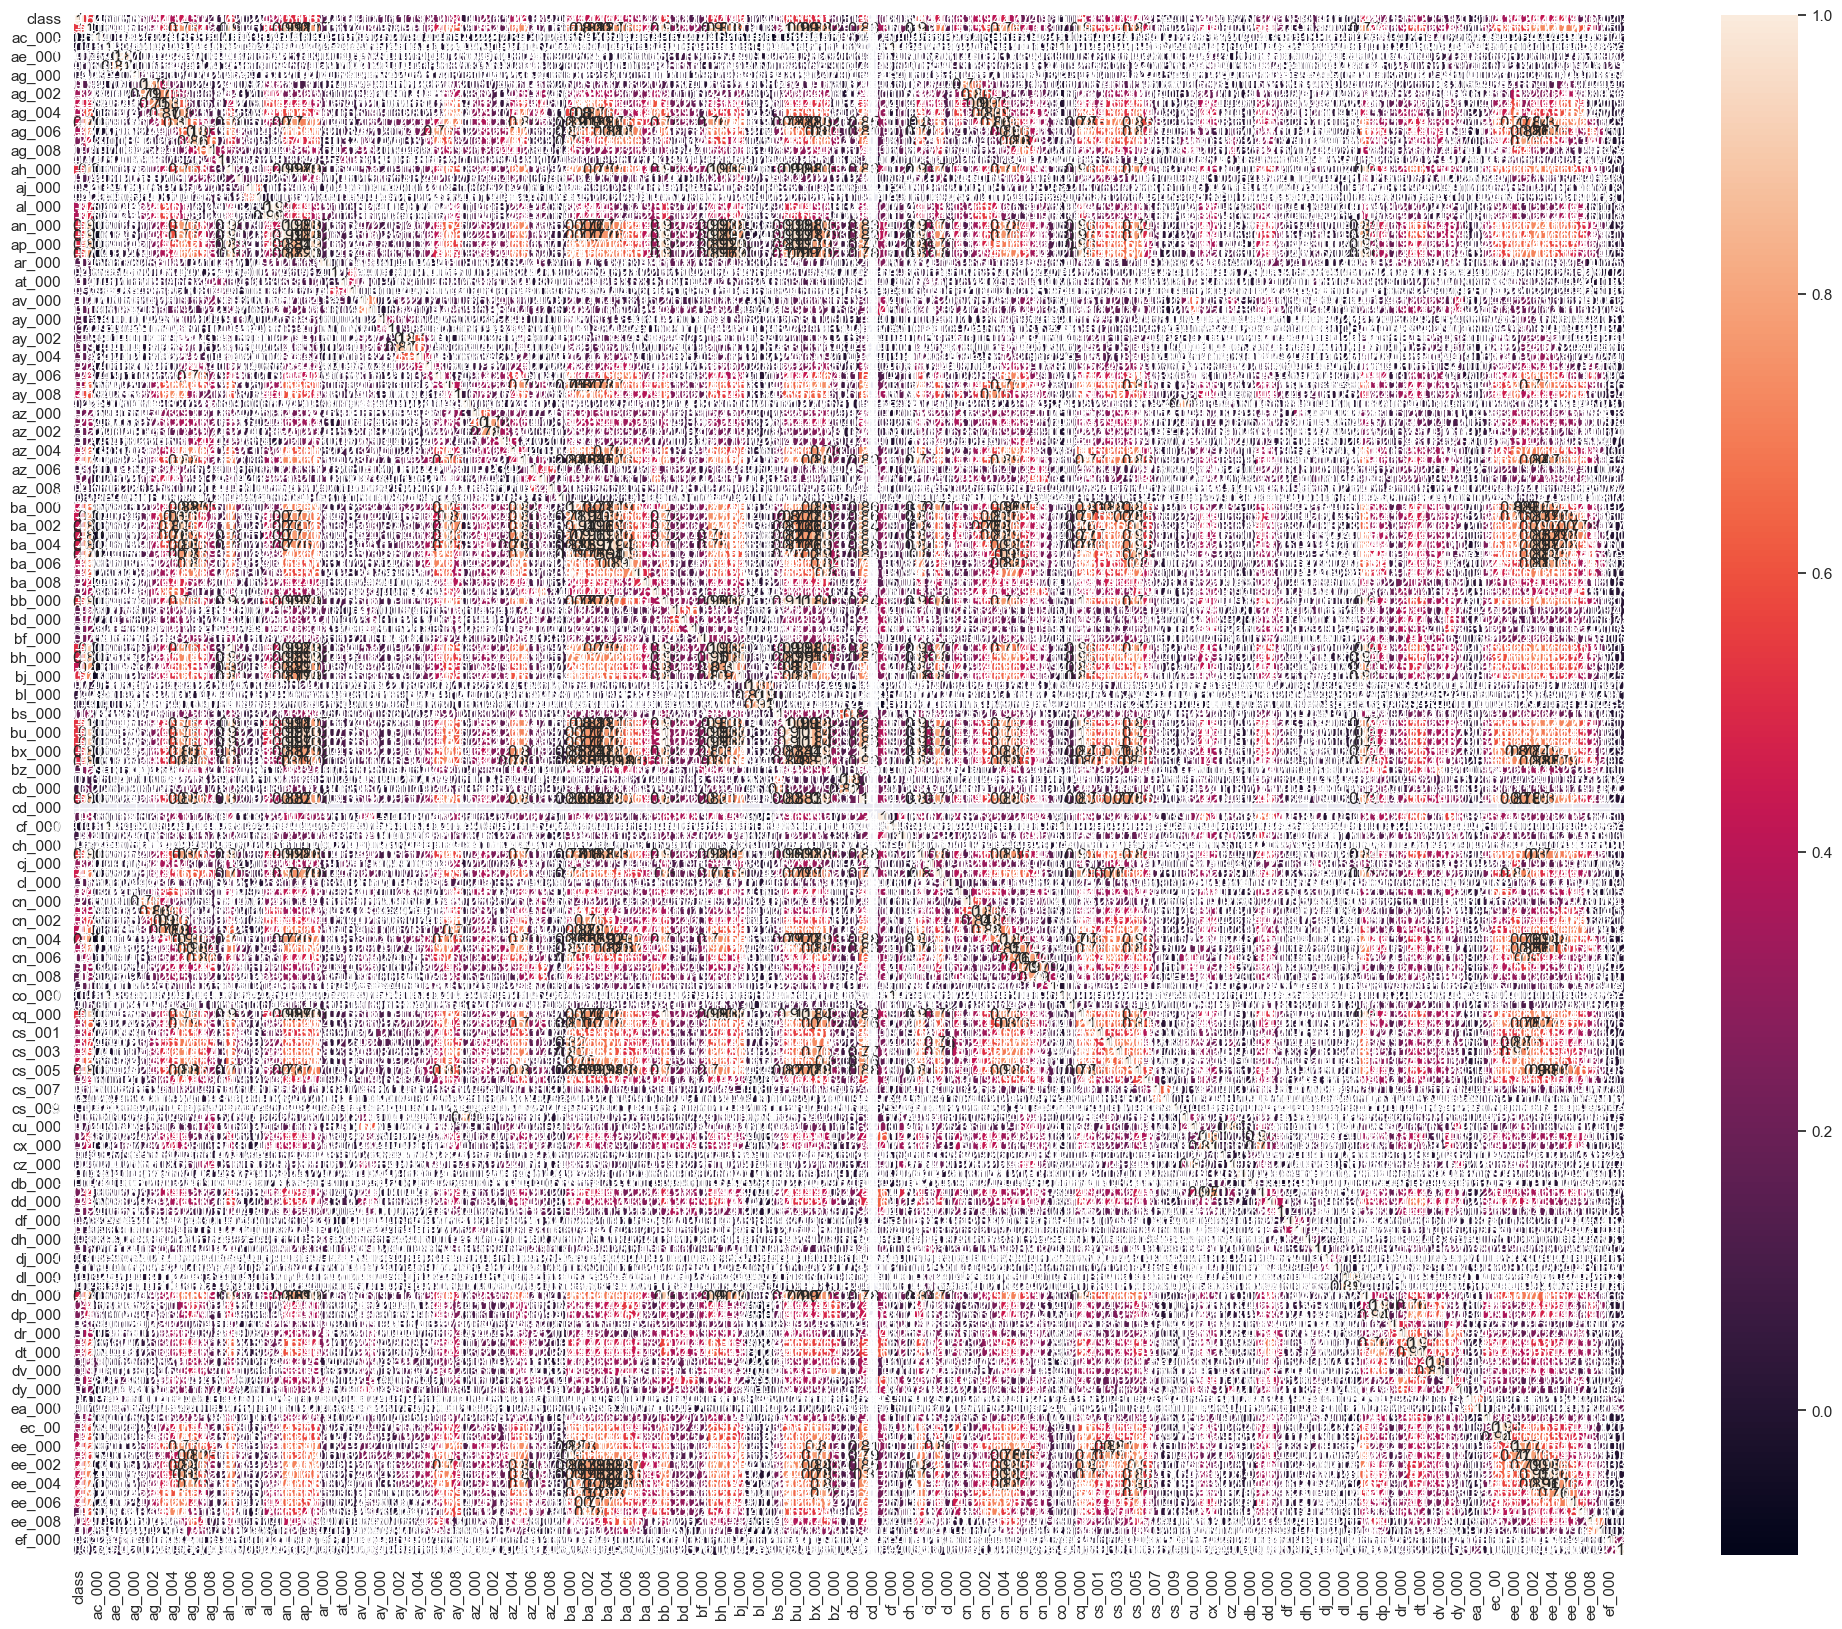

In [43]:
fig = plt.figure(figsize=(25, 20))
sns.heatmap(ApsNew_df.corr(), annot=True)
plt.savefig("Heatmap.png")

<cite id="49wof">(Pramoditha 2021)</cite>

We need to take another look at the distribution with the null values replaced.  The heatmap is a good representation of the spread of the values in the data with the replaced values 

# Data Standardisation 

I have standardized the dataframe using the StandardScalar function from sklean library.   It is important to standardise the dataframe because PCA attempts to maximize the variance of principal components so this protects the data from from a direction that would contribute to skewness.  Scaling means that it fits within a certain scale


<cite id="i1jqn">(Elgabry 2019)</cite>

<cite id="qk1cy">(Hackeling 2017)</cite>

Firstly I need to drop the dependant variable 'class' as that would affect the prediction pattern that we are looking for in the data 

In [44]:
APS_df = ApsNew_df.drop(ApsNew_df["class"])


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(ApsNew_df)
X_scaled = scaler.transform(ApsNew_df)

Now I have scalled the data I can move on to the Principal Componant Analysis 

## Principal Componant Analysis on our Dataset 

Principal Componant Analysis, PCA, is an unsupervised dimensionality reducted technique used to maximize our ability to find a pattern between two axis in a two dimensional dataframe.  It essentially finds the principal axis in the data and uses those axis to create a pattern <cite id="lyvl7">(Jake 2016)</cite> ready for machine learning

Firstly I import our libraries as laid out in my introduction 

In [46]:
%matplotlib inline 
import numpy as np 
from sklearn.decomposition import PCA
import seaborn as sns; 
import matplotlib.pyplot as plt
sns.set() 

In [47]:
pca = PCA().fit(APS_df)



Above we are using PCA and giving it the dataset that we want to run 

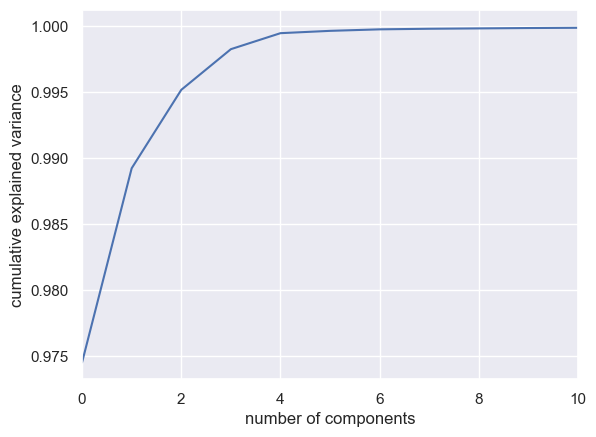

In [48]:

plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance')
plt.xlim(0,10)
plt.grid(True)
plt.show()

The graph is plotted using cumulative summary of the explained variance ratio.  I've mapped the number of componants to 10 as out intention is to reduce them.  This graph helps us to understand the loss of information as per the explained varience and helps us understand the level of redundancy present in multiple observations. <cite id="5viiv">(Jake 2016)</cite>   I can now see how many componants, 2, I need to achieve a 99.5% variance


In [49]:
print(np.cumsum(pca.explained_variance_))

[6.03337696e+17 6.12456303e+17 6.16140930e+17 6.18051045e+17
 6.18802969e+17 6.18911826e+17 6.18982451e+17 6.19010317e+17
 6.19028516e+17 6.19044091e+17 6.19056479e+17 6.19066290e+17
 6.19075192e+17 6.19082594e+17 6.19087966e+17 6.19092575e+17
 6.19095752e+17 6.19098440e+17 6.19100942e+17 6.19102680e+17
 6.19104352e+17 6.19105748e+17 6.19106988e+17 6.19108196e+17
 6.19109301e+17 6.19110373e+17 6.19111319e+17 6.19112200e+17
 6.19112992e+17 6.19113706e+17 6.19114342e+17 6.19114920e+17
 6.19115468e+17 6.19115990e+17 6.19116469e+17 6.19116850e+17
 6.19117215e+17 6.19117565e+17 6.19117879e+17 6.19118179e+17
 6.19118468e+17 6.19118732e+17 6.19118988e+17 6.19119232e+17
 6.19119459e+17 6.19119663e+17 6.19119857e+17 6.19120042e+17
 6.19120212e+17 6.19120372e+17 6.19120513e+17 6.19120653e+17
 6.19120777e+17 6.19120897e+17 6.19121014e+17 6.19121118e+17
 6.19121208e+17 6.19121295e+17 6.19121378e+17 6.19121457e+17
 6.19121523e+17 6.19121586e+17 6.19121642e+17 6.19121691e+17
 6.19121737e+17 6.191217

In [50]:
pca = PCA(2)
projected = pca.fit_transform(APS_df)

I use the fit_transform method here to I can scale the training set 

In [51]:
projected.shape

(59998, 2)

In [52]:
APS_pca = pd.DataFrame(projected, columns = ["PCA1","PCA2"])

I've created the two variables for the two components 

In [53]:
APS_pca.head()

PCA1          PCA2
0 -3.361677e+08 -5.627315e+06
1 -3.361448e+08 -6.271502e+06
2 -3.362207e+08 -4.904909e+06
3  1.794542e+09 -6.490100e+05
4 -3.361447e+08 -6.254159e+06

The pattern that I had in our cleaned dataset is contained within these figures and I can use this pattern to create an algorithm and train it.  Now I need to reintroduce the 'class', our dependant variable, into the this dataset to be ready for Machine Learning.  I will print the cumulative sum of the trained set

In [54]:
print(np.cumsum(pca.explained_variance_))

[6.03337696e+17 6.12456303e+17]


In [55]:
APS_pca["Class"] = ApsFailureSet_df["class"]

I now reintroduce the column 'Class', the dependant variable

In [56]:
APS_pca.head()

PCA1          PCA2  Class
0 -3.361677e+08 -5.627315e+06      0
1 -3.361448e+08 -6.271502e+06      0
2 -3.362207e+08 -4.904909e+06      0
3  1.794542e+09 -6.490100e+05      0
4 -3.361447e+08 -6.254159e+06      0

In [57]:
APS_array = APS_pca.values

I've created an array with the PCA values 

In [58]:
from sklearn.model_selection import train_test_split
X = APS_array[:,0:2]
y = APS_array[:,2]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

I now split it into test and train subsets to evaluate the performance 

In [59]:
from sklearn.decomposition import PCA 
pca= PCA(n_components = 2)
pca.fit(X)
PCA(copy=True, n_components=2, whiten=False)

PCA(n_components=2)

I fit the pca with the nnumber of componants I've input 

In [60]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression() 
cls.fit(X_train, Y_train)
predictions = cls.predict(X_validation)
print(predictions)

[0. 0. 0. ... 1. 0. 0.]


From sklearn I import Logistic Regression to fit the test/ train subsets to compute the prediction for the accuracy score and confusion matrix, to define the perfomance of the classification algorithm 

<cite id="8dl3y">(Kulkarni n.d.)</cite>

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.8274166666666667
[[9897 1900]
 [ 171   32]]


In [62]:
print(pca.components_) 

[[1. 0.]
 [0. 1.]]


## Purpose of Principal Componant Analysis 

The data is very skewed to failures both related and not related to the Air Pressure Systems on the Scania Trucks.  After the data is cleaned and prepated, PCA will estimate the most accurate axis for which to design a model that holds a pattern.  This model can be used in predictions using Machine Learning for Scania Trucks going forward 

## What is the 'Curse of Dimensionality'

The ‘Curse of Dimensionality’ essentially refers to the challenges faced in Machine Learning when faced with a high dimensional dataset when trying to use algorithms to predict patterns.  The problem with a high number of variables is that as number of features grows, the amount of data that we need to generate accurately grows ascendingly.  In this scenario it becomes nearly impossible to achieve an outcome and the performance of machine learning algorithms degrade.  <cite id="144lr">(Brownlee 2020)</cite>

The more features the more observations, and this is problem when it comes to Machine Learning algorithms in terms of accuracy.  If dimensionality reduction is not performed the predictions from the Machine Learning will be far less effective.  PCA creates the pattern from the dimensional data, in turn assisting in tackling the Curse of Dimensionality 




# Bibliography 

\begin{thebibliography}{4}
\bibitem{zotero|12244698/NQPCWRXN}
Agrawal, R. 2022, ‘Interpolation | Interpolation in Python to Fill Missing Values’, {\em Interpolation – Power of Interpolation in Python to fill Missing Values}, viewed 26 October 2022, <https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/>.


\bibitem{zotero|12244698/MTGLNYMZ}
Brownlee, J. 2020, ‘Introduction to Dimensionality Reduction for Machine Learning’, {\em Machine Learning Mastery}, viewed 29 October 2022, <https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/>.


\bibitem{zotero|12244698/YMW7BA69}
Elgabry, O. 2019, ‘The Ultimate Guide to Data Cleaning’, {\em Medium}, viewed 1 November 2022, <https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4>.


\bibitem{zotero|12244698/XXCRL62K}
Hackeling, G. 2017, {\em Mastering Machine Learning with scikit-learn}, Packt Publishing Ltd.


\bibitem{zotero|12244698/GGHMWXUG}
Jake, V. 2016, {\em Python Data Science Handbook}, viewed 28 October 2022, <https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html>.


\bibitem{zotero|12244698/DRYPQLCV}
Kulkarni, A. n.d., {\em Confusion Matrix - an overview | ScienceDirect Topics}, viewed 1 November 2022, <https://www.sciencedirect.com/topics/engineering/confusion-matrix>.


\bibitem{zotero|12244698/J4VCAEXL}
LookIntoEast 2017, {\em How to drop column according to NAN percentage for dataframe?}, {\em Stack Overflow}, Forum post, viewed 31 October 2022, <https://stackoverflow.com/q/43311555>.


\bibitem{zotero|12244698/XTL79TIH}
Mallidi, A.R. 2019, ‘A Comprehensive guide on handling Missing Values’, {\em #ByCodeGarage}, viewed 26 October 2022, <https://medium.com/bycodegarage/a-comprehensive-guide-on-handling-missing-values-b1257a4866d1>.


\bibitem{zotero|12244698/5NFJXIQX}
McDonald, A. 2021, ‘Using the missingno Python library to Identify and Visualise Missing Data Prior to Machine Learning’, {\em Medium}, viewed 1 November 2022, <https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009>.


\bibitem{zotero|12244698/I39JIE4Y}
Pramoditha, R. 2021, ‘How do you apply PCA to Logistic Regression to remove Multicollinearity?’, {\em Medium}, viewed 1 November 2022, <https://towardsdatascience.com/how-do-you-apply-pca-to-logistic-regression-to-remove-multicollinearity-10b7f8e89f9b>.


\bibitem{zotero|12244698/YJ2DF3EL}
‘Python for Data Analysis. Data Wrangling with Pandas, NumPy, and IPython (2017, O’Reilly).pdf’ n.d.


\bibitem{zotero|12244698/FFMKPL2X}
‘Scikit Learn - Introduction’ n.d., viewed 31 October 2022, <https://www.tutorialspoint.com/scikit_learn/scikit_learn_introduction.htm>.


\bibitem{zotero|12244698/5QJYKHR8}
Valdecasas, J.G. 2018, {\em Answer to ‘Reduce number of plots in sns.pairplot()’}, {\em Stack Overflow}, viewed 26 October 2022, <https://stackoverflow.com/a/53718477>.


\bibitem{zotero|12244698/HN83D3ZS}
Waskom, M. 2021, ‘seaborn: statistical data visualization’, {\em Journal of Open Source Software}, vol. 6, no. 60, p. 3021, viewed 17 October 2022, <https://joss.theoj.org/papers/10.21105/joss.03021>.

\end{thebibliography}